In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pose-estimation/annotations.xml
/kaggle/input/pose-estimation/PoseEstimation/fiile_info.csv
/kaggle/input/pose-estimation/PoseEstimation/PE/20.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/6.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/5.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/8.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/10.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/0.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/9.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/1.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/16.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/23.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/7.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/28.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/22.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/24.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/13.jpg
/kaggle/input/pose-estimation/PoseEstimation/PE/17.jpg
/kaggle/input/pose-es

In [2]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 45.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

2024-04-25 17:12:46.440907: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 17:12:46.441026: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 17:12:46.564582: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


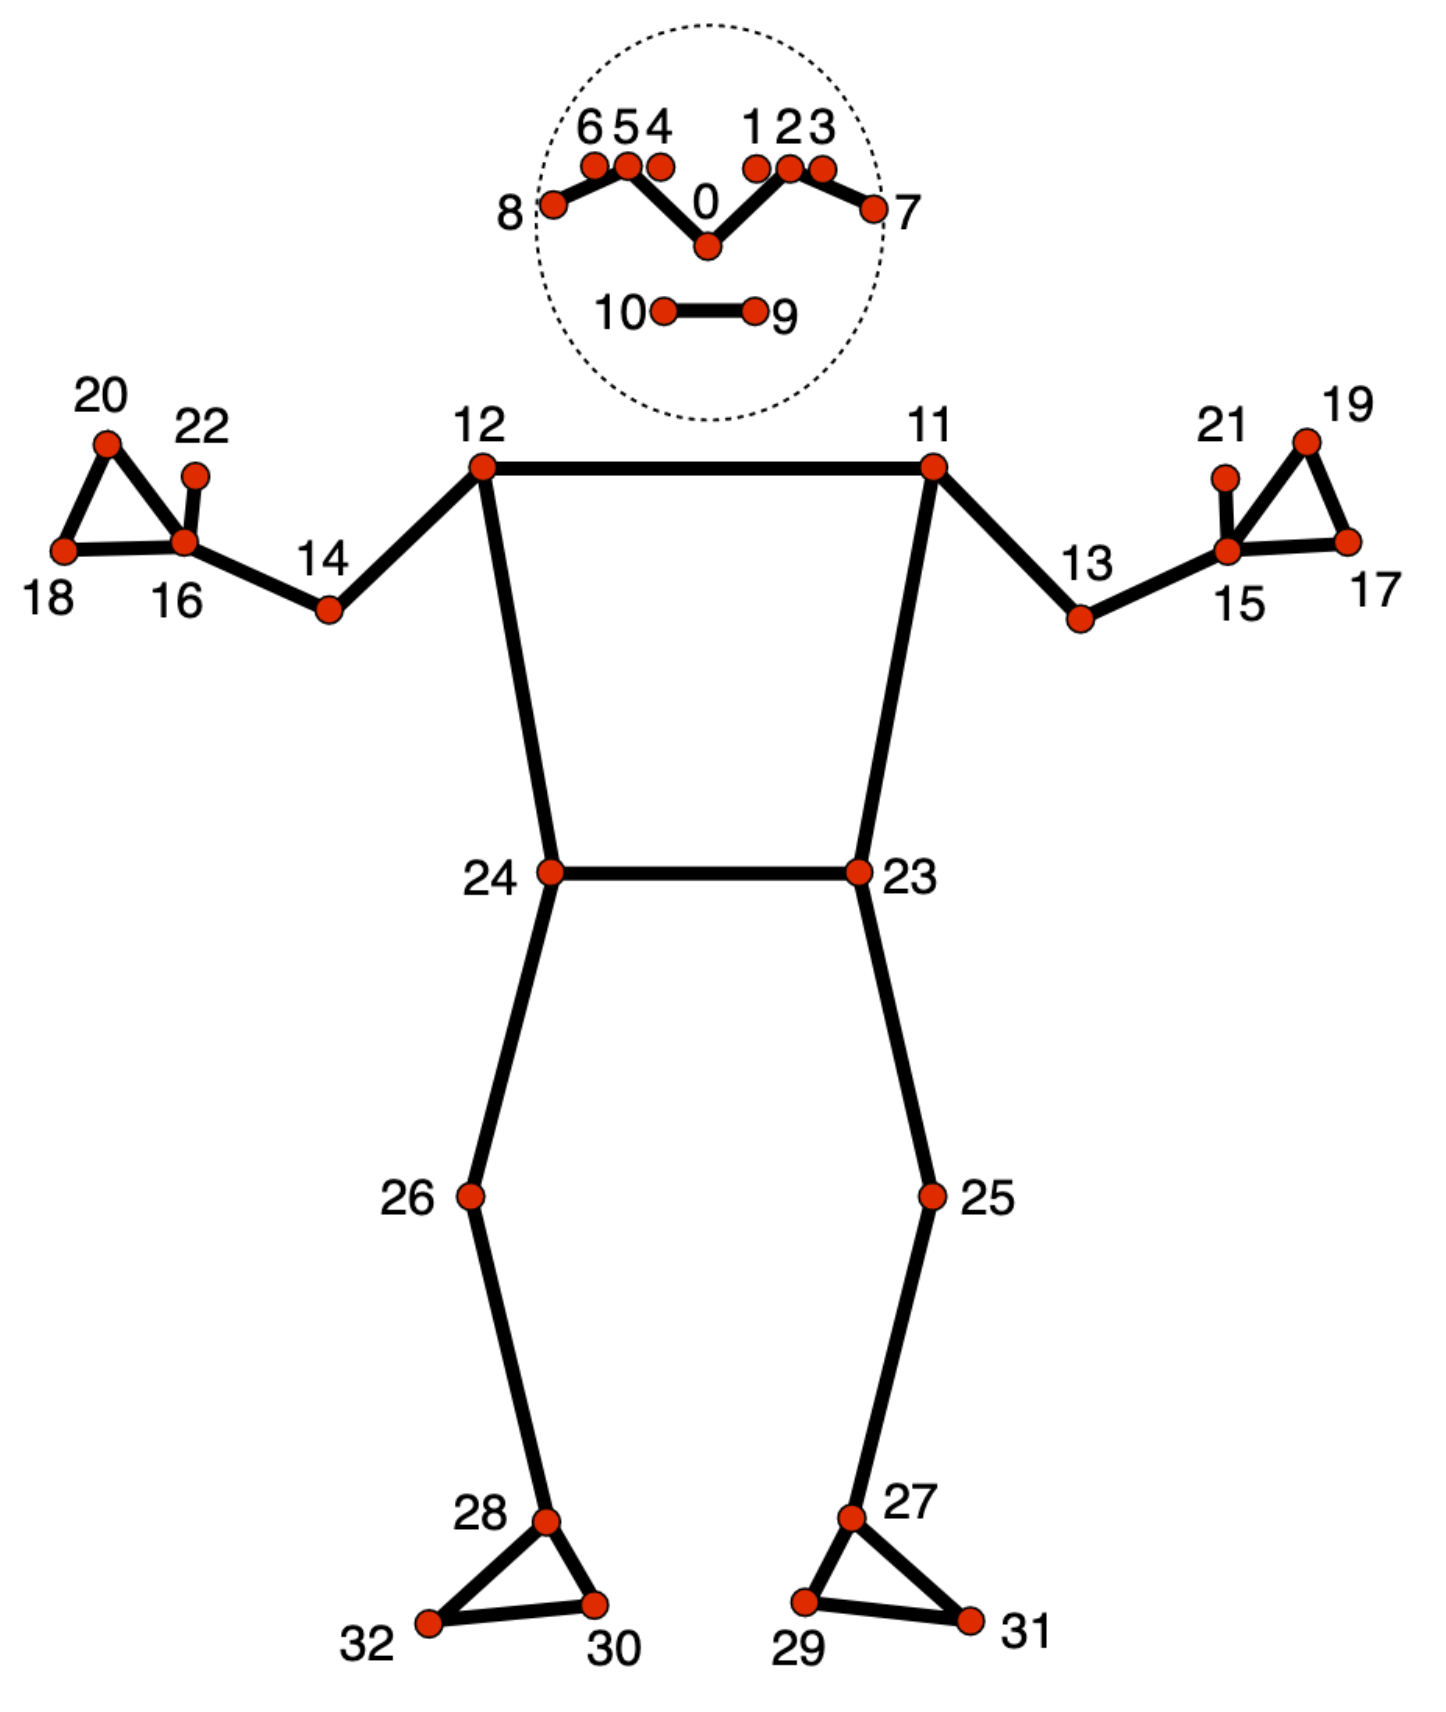0 - nose
1 - left eye (inner)
2 - left eye
3 - left eye (outer)
4 - right eye (inner)
5 - right eye
6 - right eye (outer)
7 - left ear
8 - right ear
9 - mouth (left)
10 - mouth (right)
11 - left shoulder
12 - right shoulder
13 - left elbow
14 - right elbow
15 - left wrist
16 - right wrist
17 - left pinky
18 - right pinky
19 - left index
20 - right index
21 - left thumb
22 - right thumb
23 - left hip
24 - right hip
25 - left knee
26 - right knee
27 - left ankle
28 - right ankle
29 - left heel
30 - right heel
31 - left foot index
32 - right foot index

In [4]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode = True, min_detection_confidence=0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


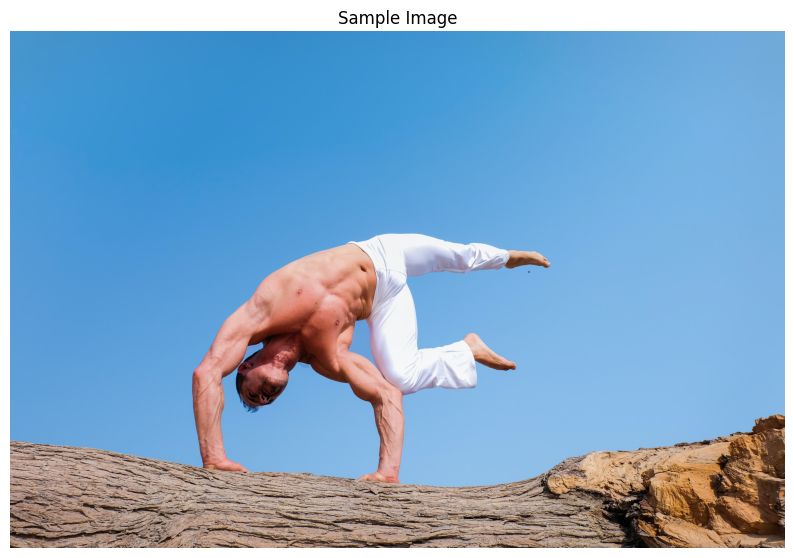

In [5]:
sample_img = cv2.imread('//kaggle/input/pose-estimation/PoseEstimation/PE/20.jpg')
plt.figure(figsize=(10,10))
plt.title('Sample Image');plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [6]:
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

if results.pose_landmarks:
  for i in range(0,32):
    print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.35007309913635254
y: 0.6635563969612122
z: -0.5813370943069458
visibility: 0.9999057054519653

LEFT_EYE_INNER:
x: 0.33847686648368835
y: 0.6698835492134094
z: -0.5946581363677979
visibility: 0.999870777130127

LEFT_EYE:
x: 0.3361591398715973
y: 0.6670158505439758
z: -0.5950164794921875
visibility: 0.9998301267623901

LEFT_EYE_OUTER:
x: 0.3336212933063507
y: 0.6642370223999023
z: -0.5949048399925232
visibility: 0.9998588562011719

RIGHT_EYE_INNER:
x: 0.3411030173301697
y: 0.6765655279159546
z: -0.5777753591537476
visibility: 0.9999552965164185

RIGHT_EYE:
x: 0.34116703271865845
y: 0.6777854561805725
z: -0.5782298445701599
visibility: 0.9999616146087646

RIGHT_EYE_OUTER:
x: 0.34119608998298645
y: 0.6790269017219543
z: -0.5784929394721985
visibility: 0.9999752044677734

LEFT_EAR:
x: 0.32572275400161743
y: 0.6494879126548767
z: -0.5629647970199585
visibility: 0.9998886585235596

RIGHT_EAR:
x: 0.33646222949028015
y: 0.6633302569389343
z: -0.48592108488082886
visibility: 0.9999653

Z Axis is telling about the depth of the image by which the pixels are having the difference from the image when we move it futher from the camera

All Axis are normalized

Visibilty shows the possibility of landmark being visible in the image

In [7]:
image_height, image_width, _ = sample_img.shape

if results.pose_landmarks:
  for i in range(20,32):
    print(f'{mp_pose.PoseLandmark(i).name}: ')
    print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
    print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
    print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
    print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

RIGHT_INDEX: 
x: 2332.3586225509644
y: 2838.2629165649414
z: -2987.5613193511963
visibility: 0.8644294142723083

LEFT_THUMB: 
x: 1373.4515619277954
y: 2705.9415893554688
z: -2858.2040519714355
visibility: 0.6803126931190491

RIGHT_THUMB: 
x: 2350.83810710907
y: 2820.2297286987305
z: -2750.578359603882
visibility: 0.8081587553024292

LEFT_HIP: 
x: 2388.337826728821
y: 1432.8629608154297
z: -146.505604326725
visibility: 0.9996100068092346

RIGHT_HIP: 
x: 2346.0734910964966
y: 1707.0914611816406
z: 146.11282700300217
visibility: 0.9997636675834656

LEFT_KNEE: 
x: 2850.5384101867676
y: 1431.7558765411377
z: 295.35940968990326
visibility: 0.6847015023231506

RIGHT_KNEE: 
x: 2415.889108657837
y: 2216.476100921631
z: -1173.3350629806519
visibility: 0.9230781197547913

LEFT_ANKLE: 
x: 3119.802978515625
y: 1438.8544063568115
z: 2513.1830520629883
visibility: 0.370602548122406

RIGHT_ANKLE: 
x: 2891.6678409576416
y: 2024.7708549499512
z: 332.8354732990265
visibility: 0.633505642414093

LEFT_HEEL

Converted Selected Normalized Landmarks displayed above into their original scale by using the width and height of the image

In [8]:
def detect_pose(image,pose,display=True):

  output_image=image.copy()
  imageRGB=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  results=pose.process(imageRGB)
  height,width, _ = image.shape
  landmarks = []
  if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=output_image,
                              landmark_list=results.pose_landmarks,
                              connections=mp_pose.POSE_CONNECTIONS)

    for landmark in results.pose_landmarks.landmark:
      landmarks.append((int(landmark.x * width),int(landmark.y * height),
                       (landmark.z * width)))

    if display:
        plt.figure(figsize=[22,22])

        plt.subplot(121)
        plt.imshow(image[:,:,::-1])
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(122)
        plt.imshow(output_image[:,:,::-1])
        plt.title('Output Image')
        plt.axis('off')

        mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)

    else:
        return output_image,landmarks

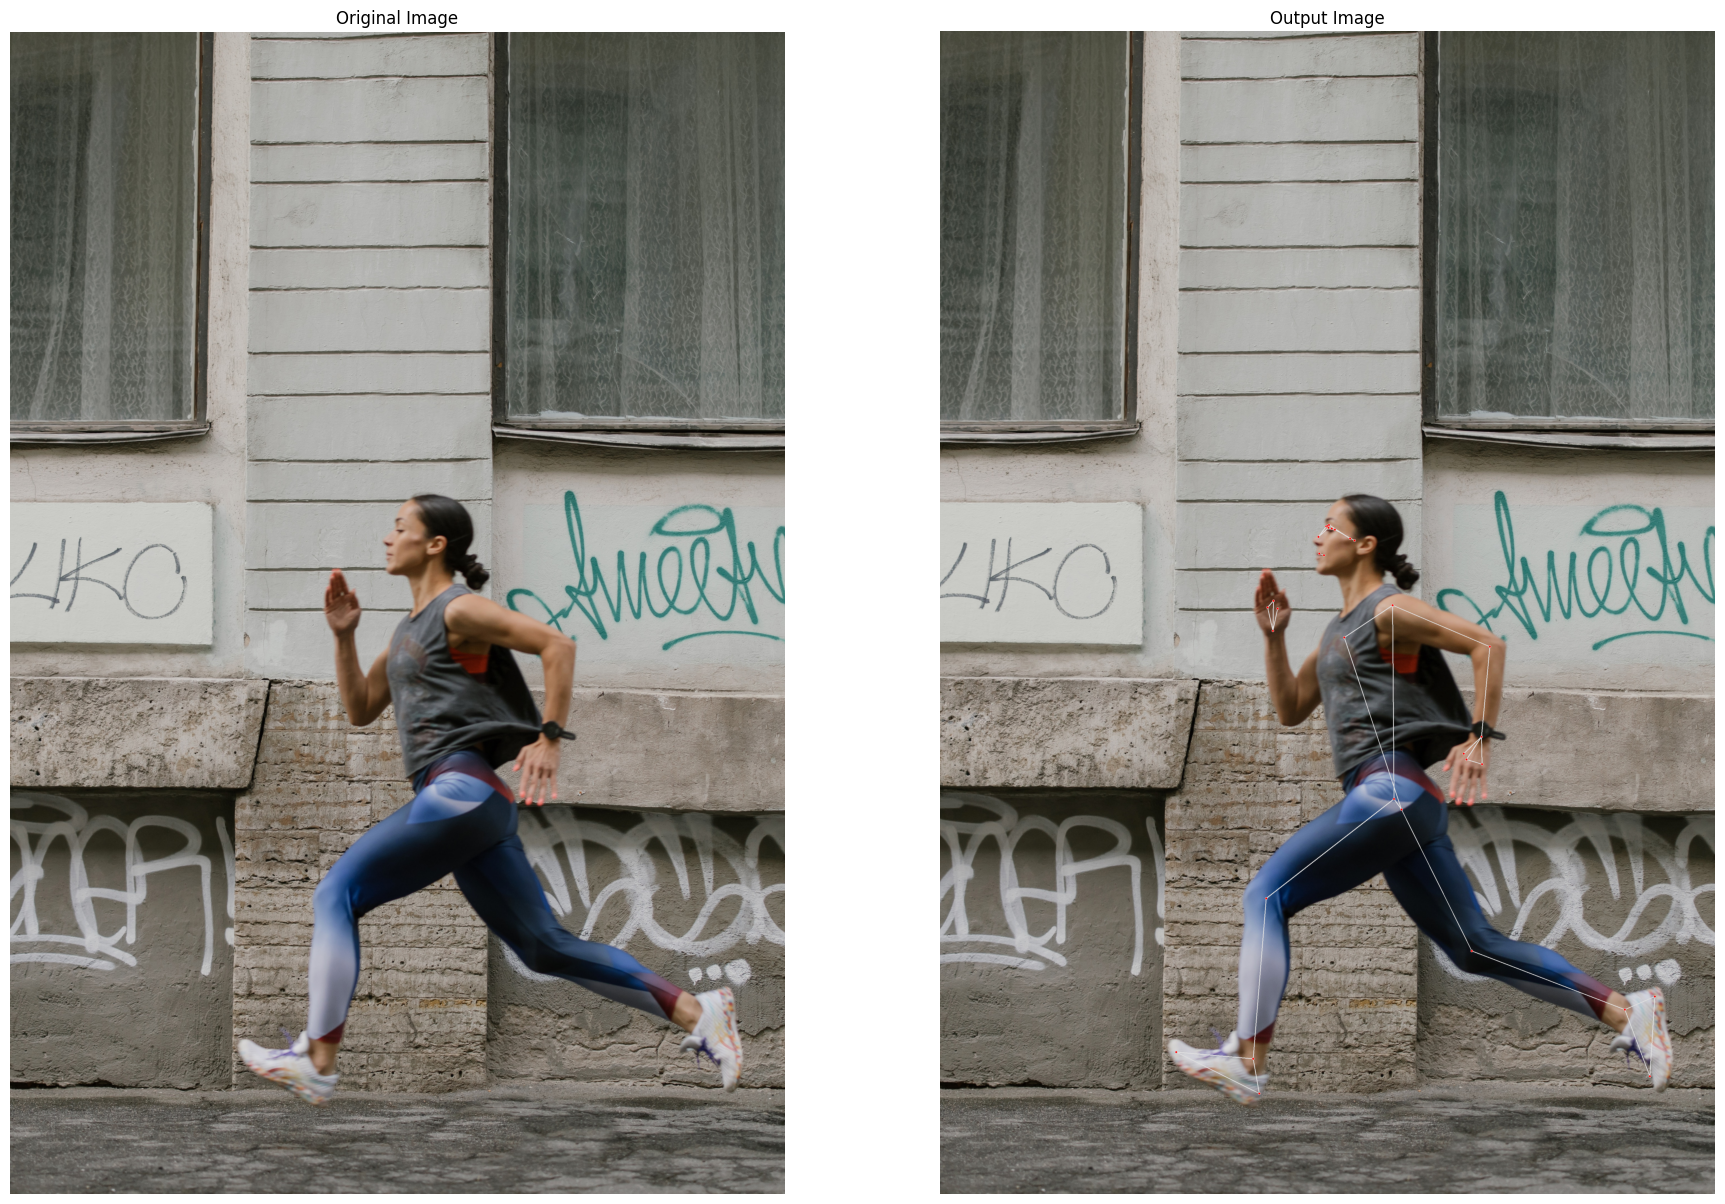

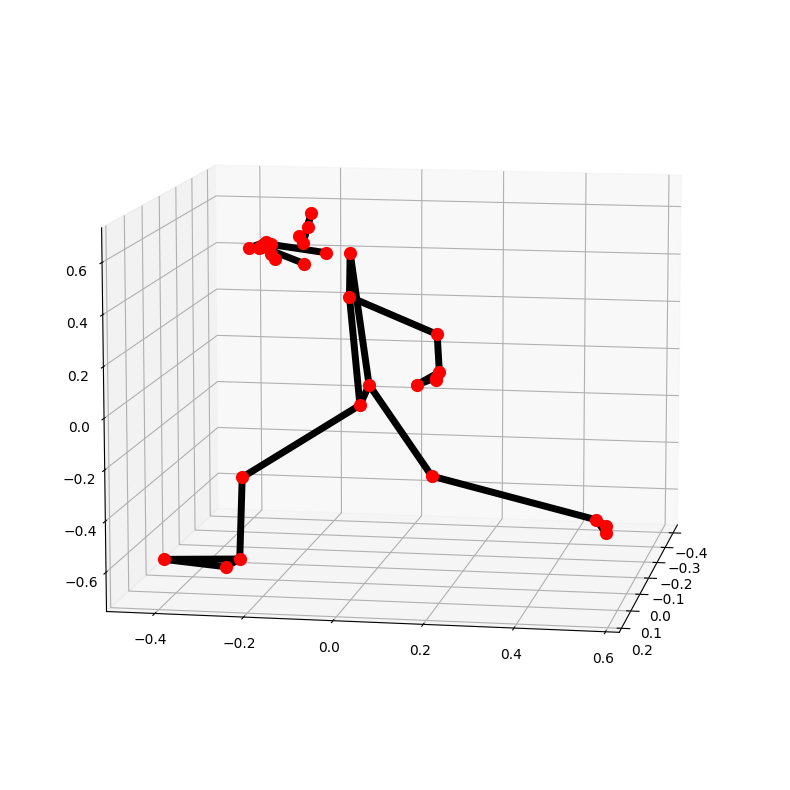

In [9]:
image = cv2.imread('/kaggle/input/pose-estimation/PoseEstimation/PE/6.jpg')
detect_pose(image, pose,display=True)